<a href="https://colab.research.google.com/github/hjn14133/Geospatial-Data-Science/blob/main/Multi_label_Classification_Deep_Learning_for_Geospatial_Data_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

In [ ]:
from fastai.vision.all import *

## Set up Data

In [ ]:
!wget http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip

In [ ]:
!unzip UCMerced_LandUse.zip

In [ ]:
path = Path("/content/UCMerced_LandUse/Images")
items = get_image_files(path)
items

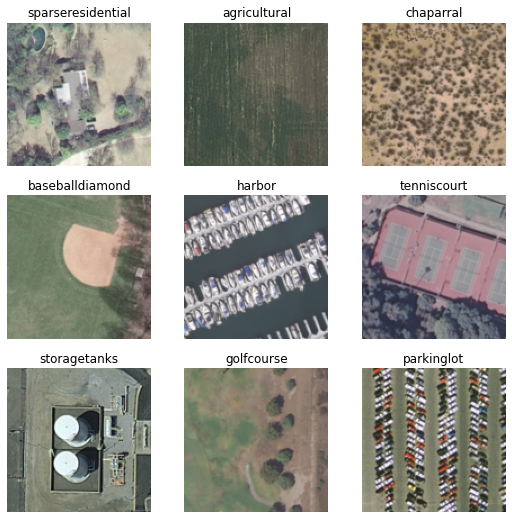

In [ ]:
data = DataBlock(blocks=(ImageBlock, CategoryBlock),  get_items=get_image_files,  splitter=RandomSplitter(valid_pct=0.3, seed=42), get_y=parent_label, item_tfms=Resize(128))
dls = data.dataloaders(path, item_tfms=Resize(128))
dls.valid.show_batch()

## Train Deep learning Model (Transfer Learning)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,3.164485,0.763859,0.228571,01:43


epoch,train_loss,valid_loss,error_rate,time
0,0.932132,0.490239,0.155556,02:22
1,0.550513,0.344747,0.112698,02:25
2,0.337107,0.306683,0.103175,02:26
3,0.219624,0.308418,0.103175,02:24
4,0.152065,0.303768,0.103175,02:25


## Interpretation

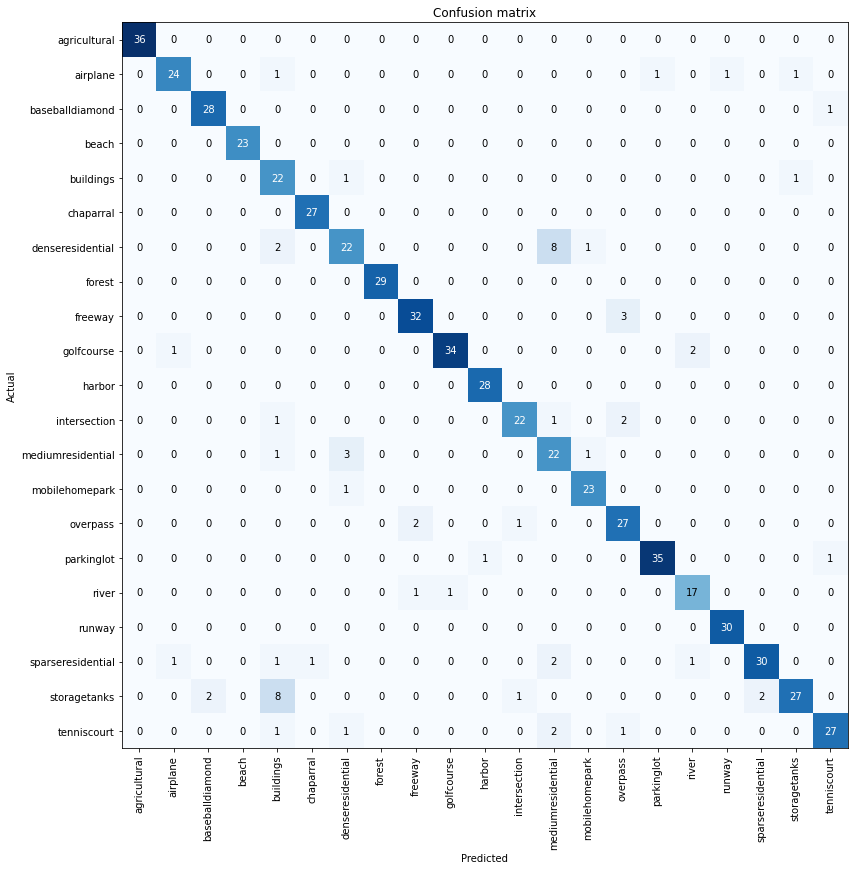

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12))

## Inference

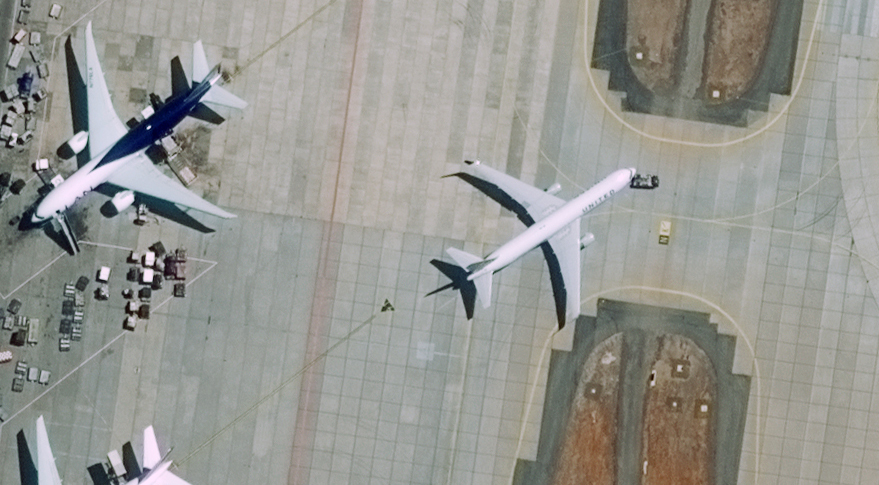



In [ ]:
![title](img/picture.png)

/bin/bash: -c: line 0: syntax error near unexpected token `img/picture.png'
/bin/bash: -c: line 0: `[title](img/picture.png)'


In [ ]:
learn.predict("download_flight.jpg")[0]

'airplane'